# Load Necessary Libraries 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [2]:
#load data
t_train=pd.read_csv("train.csv")
t_test=pd.read_csv("test.csv")

In [5]:
#Show data
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Description of the data
t_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#show missing value
t_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Description of the fare
t_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [47]:
Description of the age
t_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# data visualization

Text(0.5, 1.0, ' Survived by Pclass')

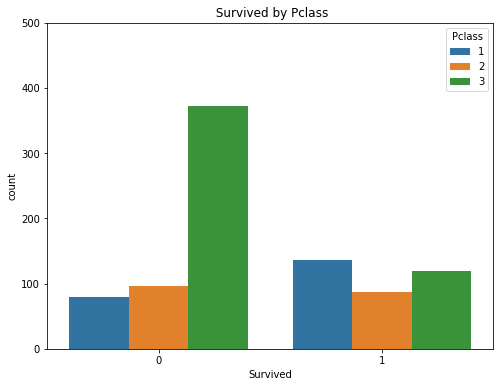

In [56]:
#For jupyter to visualize data %matplotlib inline
%matplotlib inline 
# Recall seaborn library
#import seabor as sns
fig, ax=plt.subplots(figsize=(8,6)) # size figure
sns.countplot(x='Survived', data=t_train, hue="Pclass") 
ax.set_ylim(0,500)
plt.title(" Survived by Pclass")


Text(0.5, 1.0, ' Survived by gnder')

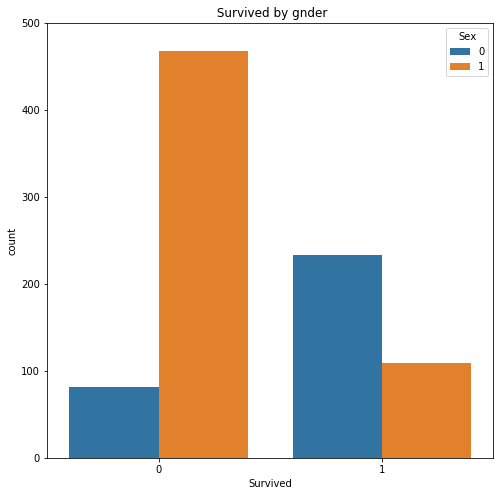

In [53]:
fig, ax=plt.subplots(figsize=(8,8))
sns.countplot(x='Survived', data=t_train, hue='Sex')
ax.set_ylim(0,500)
plt.title(" Survived by gnder")


Text(0.5, 1.0, ' Survived by Embarked ')

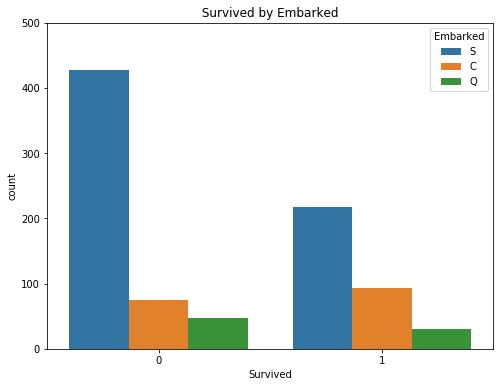

In [25]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Survived', data=t_train, hue='Embarked')
ax.set_ylim(0,500)
plt.title(" Survived by Embarked ")


Text(0.5, 1.0, ' Age ')

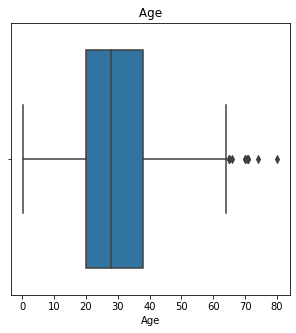

In [22]:
fig, ax=plt.subplots(figsize=(5,5))
sns.boxplot(x="Age",hue="Age",data=t_train)
plt.title(" Age ")


In [23]:
#Use corrlation
corr_matrix =t_train.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


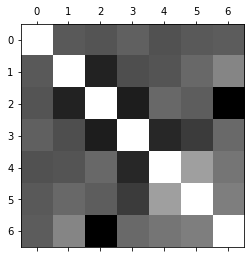

In [12]:
plt.matshow(corr_matrix, cmap=plt.cm.gray)
plt.show()

# Build model use Random Forest Classifier

In [3]:
#change the values of sex in male to 1 and female to 0
t_train.Sex.replace("male",1,inplace=True)
t_train.Sex.replace("female",0,inplace=True)

In [7]:
#Chaeck values
t_train.Sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [4]:
#change the values of Embarked in s to 1 ,q to 2 and c to 3
t_train.Embarked.replace("S",1,inplace=True)
t_train.Embarked.replace("Q",2,inplace=True)
t_train.Embarked.replace("C",3,inplace=True)

In [ ]:
t_train.Embarked

In [11]:
#select the features and label  x is features and y is label
x=t_train[['PassengerId','Pclass','Sex','Age','Fare' ,'Embarked']]
y=t_train.Survived
#use x.fillna(x.mean(),inplace=True) fill in values to mean
x.fillna(x.mean(),inplace=True)
#split data to train and test
# recall from sklearn.model_selection import train_test_split in sklearn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
# use GridSearchCV to select best Random Forest Classifier 
rf_clf=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
   
}

CV_rfc = GridSearchCV(estimator=rf_clf,param_grid=param_grid,cv=5)
CV_rfc.fit(x_train, y_train)
print(CV_rfc.best_params_)

In [49]:
#use Random Forest Classifier
#recall from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc1=RandomForestClassifier(max_features='auto', n_estimators= 500, max_depth=6, criterion='gini')
#print accuracy for algorithm
rfc1.fit(x,y)
print(cross_val_score(rfc1, x, y, cv=10, scoring ='accuracy').mean())

0.8271745545341049


In [36]:
#use Random Forest Classifier
#recall from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=6, criterion='gini')
rfc1.fit(x_train,y_train)
#predict x_test values
pred=rfc1.predict(x_test)
#print accuracy for algorithm
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8134328358208955


In [45]:
#change file for test like train
test=t_test[['PassengerId','Pclass','Sex','Age','Fare' ,'Embarked']]
t_test.Embarked.replace("S",1,inplace=True)
t_test.Embarked.replace("Q",2,inplace=True)
t_test.Embarked.replace("C",3,inplace=True)
t_test.Sex.replace("male",1,inplace=True)
t_test.Sex.replace("female",0,inplace=True)
test.fillna(test.mean(),inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [50]:
#Cerate data frame and select PassengerId and Survived
op_rf=rfc1.predict(test)
op=pd.DataFrame(test['PassengerId'])
op['Survived']=op_rf
op

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [46]:
# save data in csv file without index 
results=op.to_csv("results_Titanic.csv",index=False)